# ЛР 1 - Максимова Екатерина ИУ5-23М

### Задание:
1. Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

2. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    * История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    * На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    * Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    * История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
3. Сформировать отчет и разместить его в своем репозитории на github.
## Описание датасета

Этот набор данных содержит основные факторы, заставляющие человека бросить текущую работуи начать искать новую. Признаки:
* enrollee_id : уникальный ID кандидата
* city: код города 
* city_development_index : индекс развития города (масштабированный) 
* gender: пол 
* relevent_experience: опыт 
* enrolled_university: Тип университетского курса, если таковой имеется
* education_level: уровень образования
* major_discipline: образовательная направленность  
* experience: опыт в годах
* company_size: количество сотрудников в текущей компании
* company_type : тип компании
* lastnewjob: разница в годах между предыдущей работой и текущей работой
* training_hours: кол-во времени потраченное на курсы
* target: 0 – не ищет работу, 1 – ищет работу

In [1]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
hr = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

# Описание датасета

In [3]:
hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Предобработка данных

Необходимо удалить неинформатиную колонку enrollee_id и заполнить пропуски в данных

In [6]:
hr = hr.drop(['enrollee_id'], axis = 1)

In [7]:
hr['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [8]:
hr['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

Сделаем строгие рамки опыта и нахождения на текущей работе

In [9]:
for i in range(len(hr.index)):
    if hr['experience'][i] == '>20':
        hr['experience'][i] = '21'
    elif hr['experience'][i] == '<1':
        hr['experience'][i] = '0'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
hr['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [11]:
for i in range(len(hr.index)):
    if hr['last_new_job'][i] == '>4':
        hr['last_new_job'][i] = '5'
    elif hr['last_new_job'][i] == 'never':
        hr['last_new_job'][i] = '0'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
retarget = {0.0: 'Not looking for job change',
           1.0: 'Looking for job change'}
hr['target'] = hr['target'].map(retarget)

# Анализ данных
## Распределение целевой переменной

<AxesSubplot:title={'center':'Распределение целевой переменной'}, ylabel='кол-во человек'>

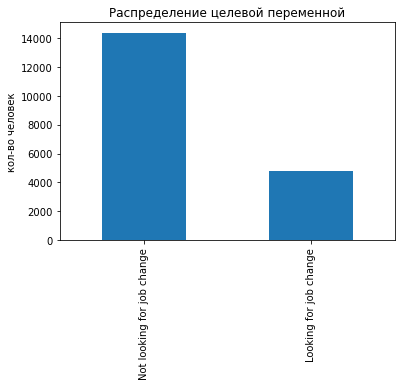

In [13]:
target = hr["target"].value_counts()
target.plot.bar(title = 'Распределение целевой переменной' , ylabel = 'кол-во человек' )

Большинство из кандидатов не ищет работу

## Кто чаще ищет работу?

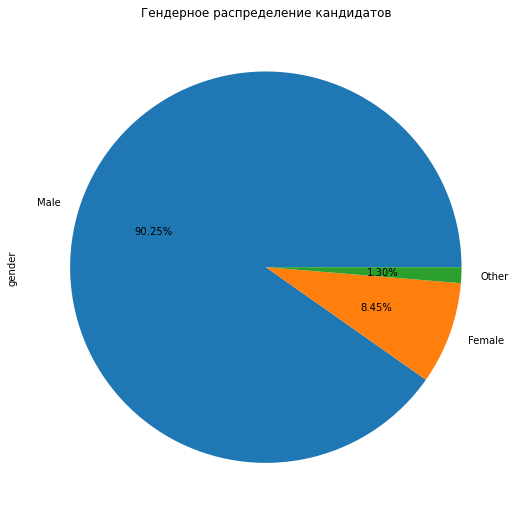

In [14]:
hr["gender"].value_counts().plot.pie(figsize = (9,9) ,autopct='%1.2f%%' , 
                title = 'Гендерное распределение кандидатов')
plt.show()

## Анализ признаков Major Discipline, Education_level, experience, training_hours на одной диаграмме


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



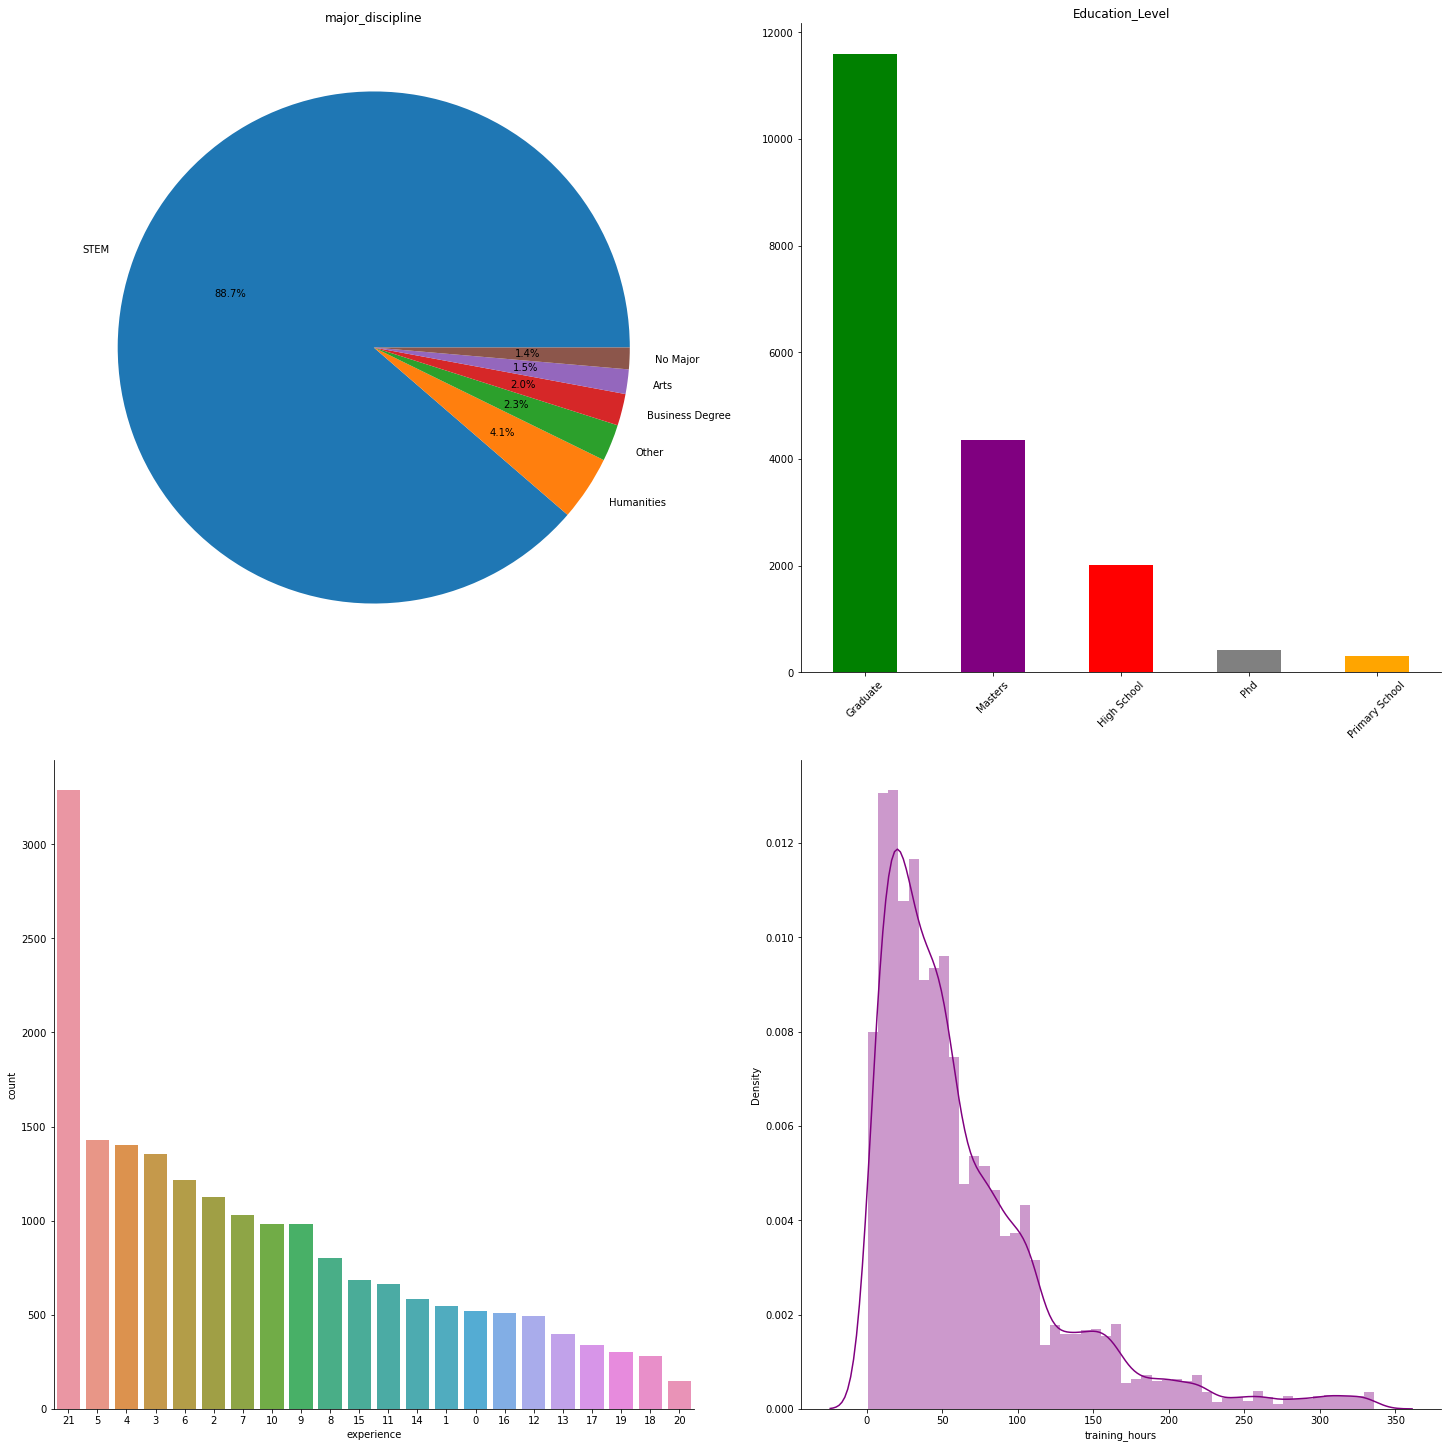

In [15]:
fig, ax = plt.subplots(nrows = 2,ncols = 2 , figsize = (9,10) , constrained_layout=True)
ax1,ax2, ax3, ax4 = ax.flatten()

major_discipilane = hr["major_discipline"].value_counts()

major_discipilane.plot.pie(figsize = (20,20) , title = 'major_discipline', ax = ax1 , ylabel = "" , autopct='%1.1f%%')
plt.ylabel("")


edu_level = hr["education_level"].value_counts()
edu_level.plot.bar(title = "Education_Level"   , 
color = ["Green" , "purple" , "red" , "grey" , "orange"] , ax = ax2  , rot = 45)
for i in ["top", "right" ]:
    ax2.spines[i].set_visible(False)

sns.countplot(hr["experience"], order = hr["experience"].value_counts().index, ax = ax3 )
# ax3.set(xlabel='Experience')

for i in ["top", "right" ]:
    ax3.spines[i].set_visible(False)

sns.distplot(hr["training_hours"] , color = 'purple' , ax = ax4)
for i in ["top", "right" ]:
    ax4.spines[i].set_visible(False)
plt.show()

1. В столбце Major Discipilane максимальное количество людей, которые ищут новую работу, - это те, кто принадлежит к категории STEM - (Science, Technology, Engineering and Mathematics) — наука, технологии, инженерия и математика.
1. В столбце Education_level мы видим, что максимальное количество людей, ищущих работу в DS - это выпускники
1. В столбце «experience» мы видим, что в основном работу ищут люди с опытом работы более 20 лет 
1. В столбце «training hours» среднее количество часов обучения людей составляет 65 часов